In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!apt-get install p7zip-full
!p7zip -d /content/drive/MyDrive/CropDataset.7z

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 1362482358 bytes (1300 MiB)

Extracting archive: /content/drive/MyDrive/CropDataset.7z
--
Path = /content/drive/MyDrive/CropDataset.7z
Type = 7z
Physical Size = 1362482358
Headers Size = 1779618
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 79         0% 379 - CropDataset/train/Apple___Apple_ . 9dc3aff8d29___FREC_Scab 3503.JPG

## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-Processing

### Training Image Pre-Processing

In [ ]:
train_dir = "./CropDataset/train"
training_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 70295 files belonging to 38 classes.


### Validation Image Pre-Processing

In [ ]:
valid_dir = "./CropDataset/valid"
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 17572 files belonging to 38 classes.


## Building Model

In [ ]:
Dense = tf.keras.layers.Dense
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Flatten = tf.keras.layers.Flatten
Dropout = tf.keras.layers.Dropout
Sequential = tf.keras.models.Sequential

In [ ]:
model = Sequential()

### Building Convolutional Layer

In [ ]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units = 1500, activation = 'relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
# output layer
model.add(Dense(units = 38, activation = 'softmax'))

## Compiling Model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Model Training

### Batch Training and Checkpointing

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/checkpoints'))


['checkpoint', 'model_checkpoints.keras', 'model_checkpoints.keras.data-00000-of-00001', 'model_checkpoints.keras.index']


In [ ]:
""""To start training model from scratch"""
checkpoint_path = "/content/drive/MyDrive/checkpoints/model_checkpoints.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
if os.path.exists(checkpoint_path + ".index"):
    model.load_weights(checkpoint_path)
    print("Checkpoint loaded successfully.")
else:
    print("No checkpoint found. Starting training from scratch.")

In [ ]:
"""To start training model from the latest checkpoint"""
checkpoint_dir = '/content/drive/MyDrive/checkpoints/'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir + "model_checkpoints.ckpt", save_weights_only=True, verbose=1, save_freq='epoch')

# Add EarlyStopping and ModelCheckpoint to the callbacks list
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

callbacks = [checkpoint_callback, early_stopping]

latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)

latest_checkpoint = checkpoint_dir + "model_checkpoints.ckpt"
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    print("Loaded latest checkpoint:", latest_checkpoint)
else:
    print("No checkpoint found. Starting training from scratch.")


ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/MyDrive/checkpoints/model_checkpoints.ckpt


No checkpoint found. Starting training from scratch.


In [ ]:
latest_checkpoint = tf.train.latest_checkpoint('/content/drive/MyDrive/checkpoints/')
if (latest_checkpoint):
    model.load_weights(latest_checkpoint)
    print("Loaded latest checkpoint:", latest_checkpoint)
else:
     print("No checkpoint found. Starting training from scratch.")

Loaded latest checkpoint: /content/drive/MyDrive/checkpoints/model_checkpoints.ckpt


In [ ]:
combined_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

In [ ]:
for i in range(0, 10, 2):
    training_history = model.fit(training_dataset, epochs=2, validation_data=validation_dataset, callbacks=callbacks)

    # Accumulate the metrics
    combined_history['accuracy'] += training_history.history['accuracy']
    combined_history['val_accuracy'] += training_history.history['val_accuracy']
    combined_history['loss'] += training_history.history['loss']
    combined_history['val_loss'] += training_history.history['val_loss']

    # Save the combined history
    combined_history_df = pd.DataFrame(combined_history)
    combined_history_df.to_csv('combined_history.csv', index=False)

Epoch 1/2
2197/2197 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9840
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/model_checkpoints.ckpt
2197/2197 [==============================] - 898s 409ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.1305 - val_accuracy: 0.9606
Epoch 2/2
  78/2197 [>.............................] - ETA: 13:54 - loss: 0.0777 - accuracy: 0.9724

KeyboardInterrupt: 

In [ ]:
train_loss, train_acc = model.evaluate(training_dataset)

2197/2197 [==============================] - 157s 72ms/step - loss: 0.0401 - accuracy: 0.9870


In [ ]:
print('Training accuracy:', train_acc, train_loss)

Training accuracy: 0.986997663974762 0.04005134105682373


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_dataset)

550/550 [==============================] - 39s 71ms/step - loss: 0.1305 - accuracy: 0.9606


In [ ]:
print('Validation accuracy:', val_acc, val_loss)

Validation accuracy: 0.9605622291564941 0.1305379569530487


### Saving Model

In [ ]:
model.save('/content/drive/MyDrive/crop_disease_model.keras')

## Other Metrics for Model Evaluation

In [ ]:
class_name = validation_dataset.class_names

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_dataset)
y_pred, y_pred.shape

550/550 [==============================] - 38s 69ms/step


(array([[9.99464154e-01, 2.80626352e-07, 4.66678472e-07, ...,
         6.27150498e-10, 8.03454525e-10, 2.17983853e-08],
        [9.99999464e-01, 3.51018372e-07, 8.77281980e-09, ...,
         1.10299589e-14, 1.40521720e-12, 3.57313116e-12],
        [9.99999940e-01, 1.31796118e-09, 4.79800510e-09, ...,
         1.01105884e-14, 3.62900703e-12, 1.24141752e-10],
        ...,
        [3.56803153e-16, 1.93800033e-20, 7.51937236e-15, ...,
         1.87937958e-18, 4.38324694e-17, 1.00000000e+00],
        [2.87692965e-13, 1.10025543e-16, 4.13470517e-12, ...,
         2.02505605e-14, 4.13498479e-14, 1.00000000e+00],
        [4.95040552e-20, 2.08590656e-21, 5.67454792e-18, ...,
         4.02035466e-20, 8.38631863e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x, y in test_dataset], axis=0)
true_categories, true_categories.shape

(<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>,
 TensorShape([17572, 38]))

In [ ]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true, Y_true.shape

(<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>,
 TensorShape([17572]))

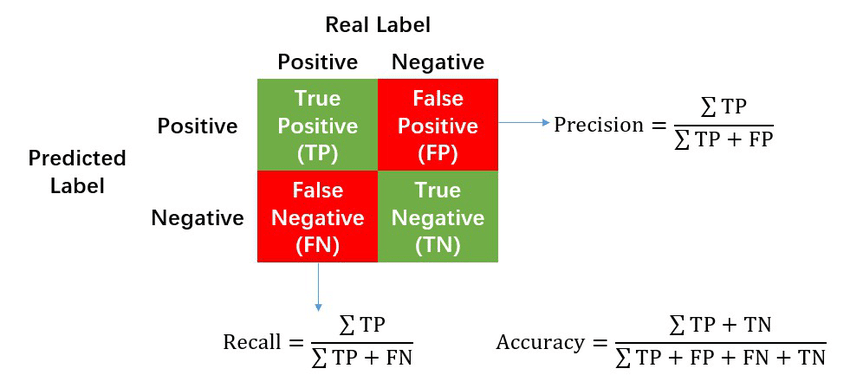

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       1.00      0.94      0.97       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.96      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.88      0.

## Confusion Matrix Visualization

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm_df = pd.DataFrame(cm,index=class_name,columns=class_name)
cm_df

,Apple___Apple_scab,Apple___Black_rot,Apple___Cedar_apple_rust,Apple___healthy,Blueberry___healthy,Cherry_(including_sour)___Powdery_mildew,Cherry_(including_sour)___healthy,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Common_rust_,Corn_(maize)___Northern_Leaf_Blight,...,Tomato___Bacterial_spot,Tomato___Early_blight,Tomato___Late_blight,Tomato___Leaf_Mold,Tomato___Septoria_leaf_spot,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_mosaic_virus,Tomato___healthy
Apple___Apple_scab,446,15,0,17,7,1,0,1,0,0,...,0,1,0,2,1,0,0,0,0,1
Apple___Black_rot,0,494,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apple___Cedar_apple_rust,2,0,414,0,0,3,0,2,0,0,...,3,1,2,0,0,0,1,4,3,2
Apple___healthy,1,0,0,485,2,0,2,0,0,0,...,0,0,1,0,0,0,1,0,0,1
Blueberry___healthy,0,0,0,3,440,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,2
Cherry_(including_sour)___Powdery_mildew,0,0,0,2,0,413,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cherry_(including_sour)___healthy,0,0,0,0,0,0,452,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,0,0,0,0,0,0,0,392,0,9,...,0,0,1,0,0,0,0,0,0,0
Corn_(maize)___Common_rust_,0,0,0,0,0,0,0,4,469,1,...,0,0,2,0,0,0,0,0,0,0
Corn_(maize)___Northern_Leaf_Blight,0,0,1,0,0,0,0,51,1,418,...,0,0,0,0,0,0,0,0,0,0


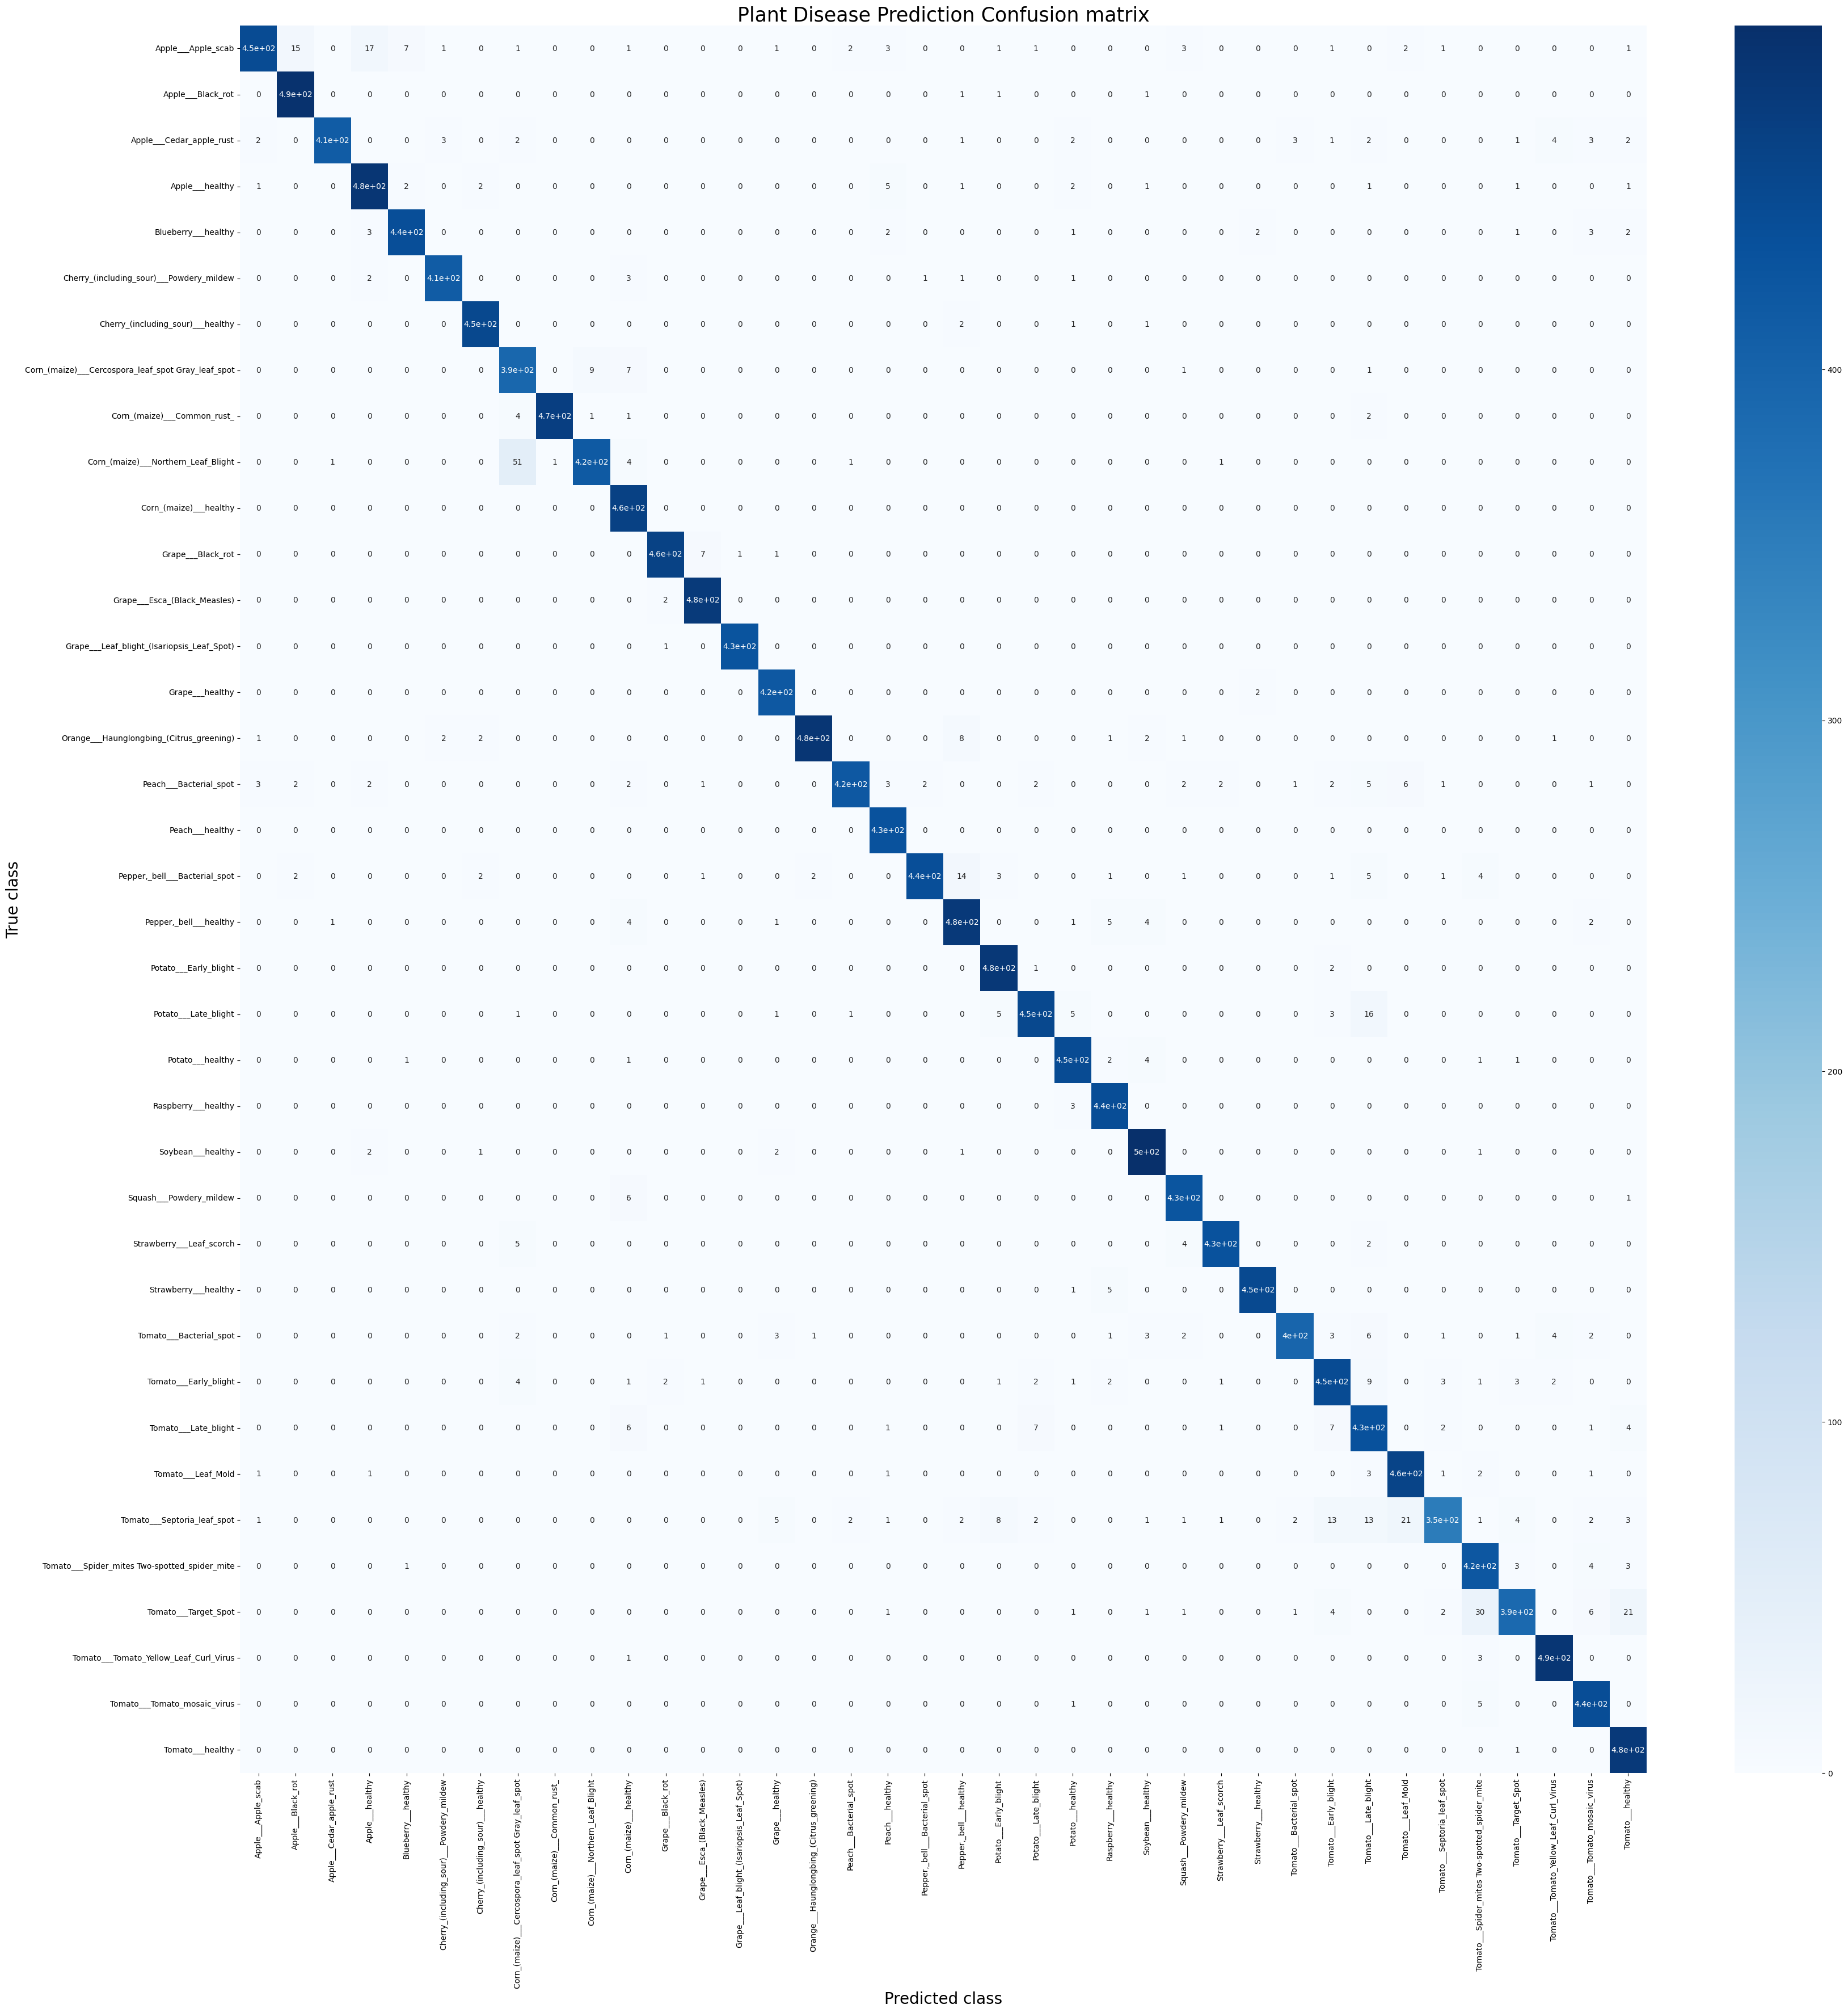

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm_df,annot=True, annot_kws={'size':10},cmap='Blues')
plt.xlabel('Predicted class', fontsize=20)
plt.ylabel('True class', fontsize=20)
plt.title("Plant Disease Prediction Confusion matrix", fontsize=25)
plt.show()